Connected to Python 3.11.4

In [12]:
from cassandra.cluster import Cluster
from cassandra.query import SimpleStatement
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [7]:
def connect_to_cassandra():
    cluster = Cluster(['localhost'])  # Replace with your Cassandra node IP
    session = cluster.connect('spark_streams')  # Replace with your keyspace name
    return session

In [33]:
from dateutil import parser

start = "2023-11-29 03:10:00.000"
original_datetime_object_start = datetime.strptime(start, "%Y-%m-%d %H:%M:%S.%f")
epoch_timestamp_start = int(original_datetime_object_start.timestamp())

end = "2023-11-29 13:30:00.000"
original_datetime_object_end = datetime.strptime(end, "%Y-%m-%d %H:%M:%S.%f")
epoch_timestamp_end = int(original_datetime_object_end.timestamp())

epoch_timestamp_start, epoch_timestamp_end

# localhost:8000/api/request-chart?project_id=project-id-1&from_timestamp=1701202200&end_timestamp=1701239400


(1701202200, 1701239400)

In [53]:


def query_request_count_by_project(session, project_id):
    query = f"""
        SELECT * FROM aggregated_api_request
        WHERE project_id = '{project_id}' AND timestamp >= '{start}';
    """
    statement = SimpleStatement(query)
    result = session.execute(statement)

    return result


In [96]:

session = connect_to_cassandra()
project_id = 'project-id-1'  # Replace with the desired project ID# Replace with the desired month bucket

result = query_request_count_by_project(session, project_id)
df = pd.DataFrame(result)

df_resampled =  df.set_index("timestamp").resample("10Min").sum().fillna(0).reset_index()
project_id = "project-id-1"

df_resampled['project_id'] = [project_id if project == 0 else project for project in df_resampled['project_id']]
# df_resampled
# resample = df.resample('10Min', on="timestamp")
df_resampled



,timestamp,project_id,avg_duration,count,event_type,fiftieth_per_duration,ninetieth_per_duration,ninety_fifth_per_duration
0,2023-11-29 03:10:00,project-id-1,7844.827637,58,PREDICT_FAILED,7000.0,14000.0,15000.0
1,2023-11-29 03:20:00,project-id-1,7692.307617,52,PREDICT_FAILED,7000.0,13000.0,15000.0
2,2023-11-29 03:30:00,project-id-1,0.000000,0,0,0.0,0.0,0.0
3,2023-11-29 03:40:00,project-id-1,7872.222168,180,PREDICT_FAILED,8000.0,14000.0,15000.0
4,2023-11-29 03:50:00,project-id-1,8060.150391,399,PREDICT_FAILED,8000.0,14000.0,15000.0
...,...,...,...,...,...,...,...,...
63,2023-11-29 13:40:00,project-id-1,0.000000,0,0,0.0,0.0,0.0
64,2023-11-29 13:50:00,project-id-1,0.000000,0,0,0.0,0.0,0.0
65,2023-11-29 14:00:00,project-id-1,0.000000,0,0,0.0,0.0,0.0
66,2023-11-29 14:10:00,project-id-1,7911.290527,124,PREDICT_FAILED,8000.0,14000.0,15000.0


In [ ]:
# 

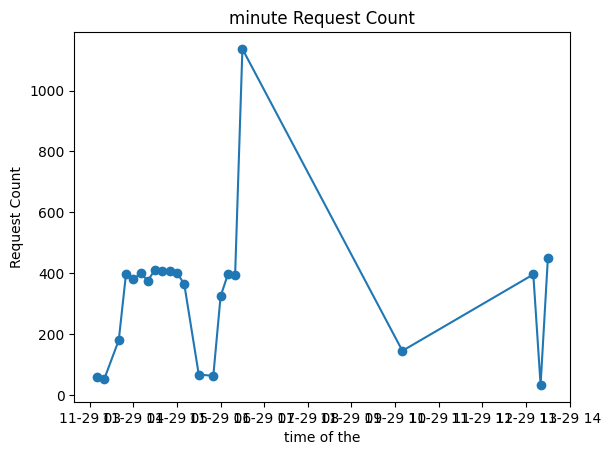

In [39]:
import matplotlib.pyplot as plt

# Group by hour and count the number of occurrences
# Plot the data
plt.plot(df['timestamp'], df['count'], marker='o')
plt.xlabel('time of the')
plt.ylabel('Request Count')
plt.title('minute Request Count')
plt.show()


In [22]:
df

,session_end,hour,minute
0,2023-11-29 03:33:21.351,3,33
1,2023-11-29 03:33:34.382,3,33
2,2023-11-29 03:33:37.388,3,33
3,2023-11-29 03:33:39.393,3,33
4,2023-11-29 03:33:39.396,3,33
...,...,...,...
2377,2023-11-29 04:35:54.136,4,35
2378,2023-11-29 04:35:58.628,4,35
2379,2023-11-29 04:35:59.632,4,35
2380,2023-11-29 04:36:03.109,4,36


In [32]:
# ###
# +------------------------------------------+-----------------+------------+-----+
# |window                                    |event_type       |project_id  |count|
# +------------------------------------------+-----------------+------------+-----+
# |{2023-11-29 10:55:00, 2023-11-29 11:05:00}|PREDICT_COMPLETED|project-id-2|442  |
# |{2023-11-29 12:20:00, 2023-11-29 12:30:00}|PREDICT_FAILED   |project-id-1|67   |
# |{2023-11-29 10:45:00, 2023-11-29 10:55:00}|PREDICT_COMPLETED|project-id-2|413  |
# |{2023-11-29 12:45:00, 2023-11-29 12:55:00}|PREDICT_FAILED   |project-id-1|119  |
# |{2023-11-29 11:30:00, 2023-11-29 11:40:00}|PREDICT_COMPLETED|project-id-3|384  |
# |{2023-11-29 12:50:00, 2023-11-29 13:00:00}|PREDICT_COMPLETED|project-id-2|328  |
# |{2023-11-29 12:50:00, 2023-11-29 13:00:00}|PREDICT_FAILED   |project-id-1|324  |
# |{2023-11-29 13:20:00, 2023-11-29 13:30:00}|PREDICT_COMPLETED|project-id-2|1027 |
# |{2023-11-29 12:35:00, 2023-11-29 12:45:00}|PREDICT_FAILED   |project-id-1|63   |
# |{2023-11-29 11:45:00, 2023-11-29 11:55:00}|PREDICT_FAILED   |project-id-1|422  |
# |{2023-11-29 13:05:00, 2023-11-29 13:15:00}|PREDICT_COMPLETED|project-id-3|387  |
# |{2023-11-29 11:25:00, 2023-11-29 11:35:00}|PREDICT_COMPLETED|project-id-3|412  |
# |{2023-11-29 13:10:00, 2023-11-29 13:20:00}|PREDICT_COMPLETED|project-id-2|404  |
# |{2023-11-29 13:10:00, 2023-11-29 13:20:00}|PREDICT_FAILED   |project-id-1|395  |
# |{2023-11-29 11:55:00, 2023-11-29 12:05:00}|PREDICT_COMPLETED|project-id-2|401  |
# |{2023-11-29 11:35:00, 2023-11-29 11:45:00}|PREDICT_COMPLETED|project-id-2|393  |
# |{2023-11-29 10:05:00, 2023-11-29 10:15:00}|PREDICT_COMPLETED|project-id-2|52   |
# |{2023-11-29 11:20:00, 2023-11-29 11:30:00}|PREDICT_COMPLETED|project-id-3|407  |
# |{2023-11-29 12:55:00, 2023-11-29 13:05:00}|PREDICT_COMPLETED|project-id-3|372  |
# |{2023-11-29 10:40:00, 2023-11-29 10:50:00}|PREDICT_COMPLETED|project-id-3|384  |
# +------------------------------------------+-----------------+------------+-----+
####


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1572444096.py, line 4)

In [ ]:
# +-----------------+------------+-----+------------------+---------------------+----------------------+-------------------------+-------------------+------------+
# |event_type       |project_id  |count|avg_duration      |fiftieth_per_duration|ninetieth_per_duration|ninety_fifth_per_duration|timestamp          |month_bucket|
# +-----------------+------------+-----+------------------+---------------------+----------------------+-------------------------+-------------------+------------+
# |PREDICT_FAILED   |project-id-1|67   |8910.44776119403  |9000                 |15000                 |15000                    |2023-11-29 12:30:00|202311      |
# |PREDICT_COMPLETED|project-id-3|384  |7867.1875         |8000                 |14000                 |15000                    |2023-11-29 11:40:00|202311      |
# |PREDICT_COMPLETED|project-id-2|328  |8143.292682926829 |8000                 |14000                 |15000                    |2023-11-29 13:00:00|202311      |
# |PREDICT_FAILED   |project-id-1|324  |8012.3456790123455|8000                 |14000                 |15000                    |2023-11-29 13:00:00|202311      |
# |PREDICT_COMPLETED|project-id-2|1027 |7883.154819863681 |8000                 |14000                 |15000                    |2023-11-29 13:30:00|202311      |
# |PREDICT_COMPLETED|project-id-2|404  |8210.39603960396  |8000                 |14000                 |15000                    |2023-11-29 13:20:00|202311      |
# |PREDICT_FAILED   |project-id-1|395  |8167.088607594937 |8000                 |14000                 |15000                    |2023-11-29 13:20:00|202311      |
# |PREDICT_COMPLETED|project-id-3|407  |7918.918918918919 |8000                 |14000                 |15000                    |2023-11-29 11:30:00|202311      |
# |PREDICT_COMPLETED|project-id-3|384  |8484.375          |8000                 |14000                 |15000                    |2023-11-29 10:50:00|202311      |
# |PREDICT_FAILED   |project-id-1|180  |7872.222222222223 |8000                 |14000                 |15000                    |2023-11-29 10:40:00|202311      |
# |PREDICT_COMPLETED|project-id-3|275  |7843.636363636364 |8000                 |14000                 |15000                    |2023-11-29 13:00:00|202311      |
# |PREDICT_FAILED   |project-id-1|52   |7692.307692307692 |7000                 |13000                 |15000                    |2023-11-29 10:20:00|202311      |
# |PREDICT_COMPLETED|project-id-2|58   |7637.931034482759 |7000                 |14000                 |15000                    |2023-11-29 10:20:00|202311      |
# |PREDICT_COMPLETED|project-id-2|421  |7684.085510688836 |7000                 |14000                 |14000                    |2023-11-29 11:00:00|202311      |
# |PREDICT_FAILED   |project-id-1|380  |7750.0            |8000                 |14000                 |14000                    |2023-11-29 11:00:00|202311      |
# |PREDICT_COMPLETED|project-id-2|396  |7952.020202020202 |8000                 |14000                 |15000                    |2023-11-29 12:00:00|202311      |
# |PREDICT_COMPLETED|project-id-3|389  |8092.54498714653  |8000                 |14000                 |14000                    |2023-11-29 11:00:00|202311      |
# |PREDICT_COMPLETED|project-id-3|41   |8439.024390243903 |8000                 |14000                 |15000                    |2023-11-29 10:20:00|202311      |
# |PREDICT_FAILED   |project-id-1|408  |7943.6274509803925|8000                 |14000                 |15000                    |2023-11-29 11:50:00|202311      |
# |PREDICT_COMPLETED|project-id-2|387  |8041.343669250646 |8000                 |14000                 |15000                    |2023-11-29 11:50:00|202311      |
# +-----------------+------------+-----+------------------+---------------------+----------------------+-------------------------+-------------------+------------+

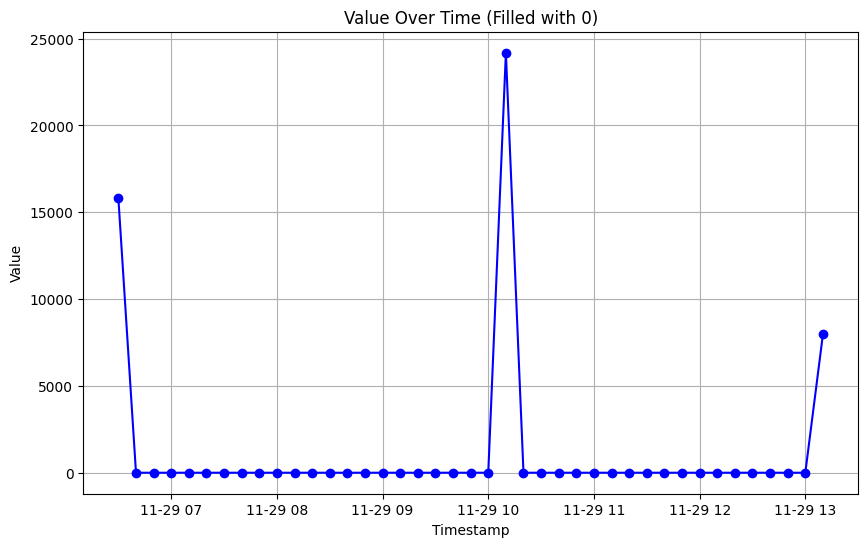

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

data = [
    ("2023-11-29 13:10:00.000", 7969.697),
    ("2023-11-29 10:10:00.000", 8293.233),
    ("2023-11-29 10:10:00.000", 7676.923),
    ("2023-11-29 10:10:00.000", 8220.689),
    ("2023-11-29 06:30:00.000", 7914.815),
    ("2023-11-29 06:30:00.000", 7883.155),
]

df = pd.DataFrame(data, columns=["Timestamp", "Value"])
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Resample the data to fill in missing time values and replace NaN with 0
df_resampled = df.set_index("Timestamp").resample("10Min").sum().fillna(0).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_resampled["Timestamp"], df_resampled["Value"], marker='o', linestyle='-', color='b')
plt.title('Value Over Time (Filled with 0)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [ ]:
# Metric Huy

# Filter: Support Day, 10 Min, 1 Hour, Month
# Total 6 * 24

# function()